Submitted by : manik_hindwan@scmhrd.edu

<b><u>Problem Statement</u></b>: The VP has laid out the requirements to you. As a Data Analyst of the Company now it’s your charter to do the required analysis and find out patterns as to why the best employees are leaving so early.
Using Python, you derive at a forecast model to predict which employees could be leaving the company, as well as a probability as to why our best and most experienced employees are leaving prematurely. This will help to plan our next steps to avoid the churn out. You decide to create a script that will contain the following:


• A visualization and distribution (of all the employee relative fields -    <span style = "color:darkblue">STEP 1 - III</span>

• Forecast using different Machine Learning models and see the outcome  -    <span style = "color:darkblue">STEP 2 & 3</span>

• Compare different Machine Learning models and cross validate them  -       <span style = "color:darkblue">STEP 4 & 5</span>

• Find out why best and most experienced employees are leaving prematurely - <span style = "color:darkblue">STEP 1 - IV</span>

• Give a Final Prediction Model (the best one) to Forecast  -                <span style = "color:darkblue">STEP 6</span>

## <span style = "color:darkblue"><u>STEP 1</u>: Making sense from data & Visualizations to answer the descriptive questions</span>

### <span style = "color:brown">I. Exploring the data frame</span>

In [36]:
import pandas as pd
import numpy as np
raw_data = pd.read_csv('./Certification Project data.csv')
raw_data.head()

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     29998 non-null  float64
 1   last_evaluation        29998 non-null  float64
 2   number_project         29998 non-null  int64  
 3   average_montly_hours   29998 non-null  int64  
 4   time_spend_company     29998 non-null  int64  
 5   Work_accident          29998 non-null  int64  
 6   left                   29998 non-null  int64  
 7   promotion_last_5years  29998 non-null  int64  
 8   sales                  29998 non-null  object 
 9   salary                 29998 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 2.3+ MB


In [3]:
raw_data['left'].value_counts()

0    22856
1     7142
Name: left, dtype: int64

In [4]:
raw_data.sales.value_counts()

sales          8280
technical      5440
support        4458
IT             2454
product_mng    1804
marketing      1716
RandD          1574
accounting     1534
hr             1478
management     1260
Name: sales, dtype: int64

In [5]:
raw_data.salary.value_counts()

low       14632
medium    12892
high       2474
Name: salary, dtype: int64

In [6]:
raw_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248627,0.171166,1.232572,49.942267,1.460112,0.351713,0.425917,0.144279
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


No outliers found. Good!

### <span style = "color:brown">II. Correlation analysis</span>

In [439]:
raw_data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<span style = "color:orange"> <b>Conclusion:</b></span>
The features which have showed significant correlation with the label are 'left', 'satisfaction_level', 'time_spend_company'and 'Work_accident'

### <span style = "color:brown">III. Exploratory data analysis and visualization</span>

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

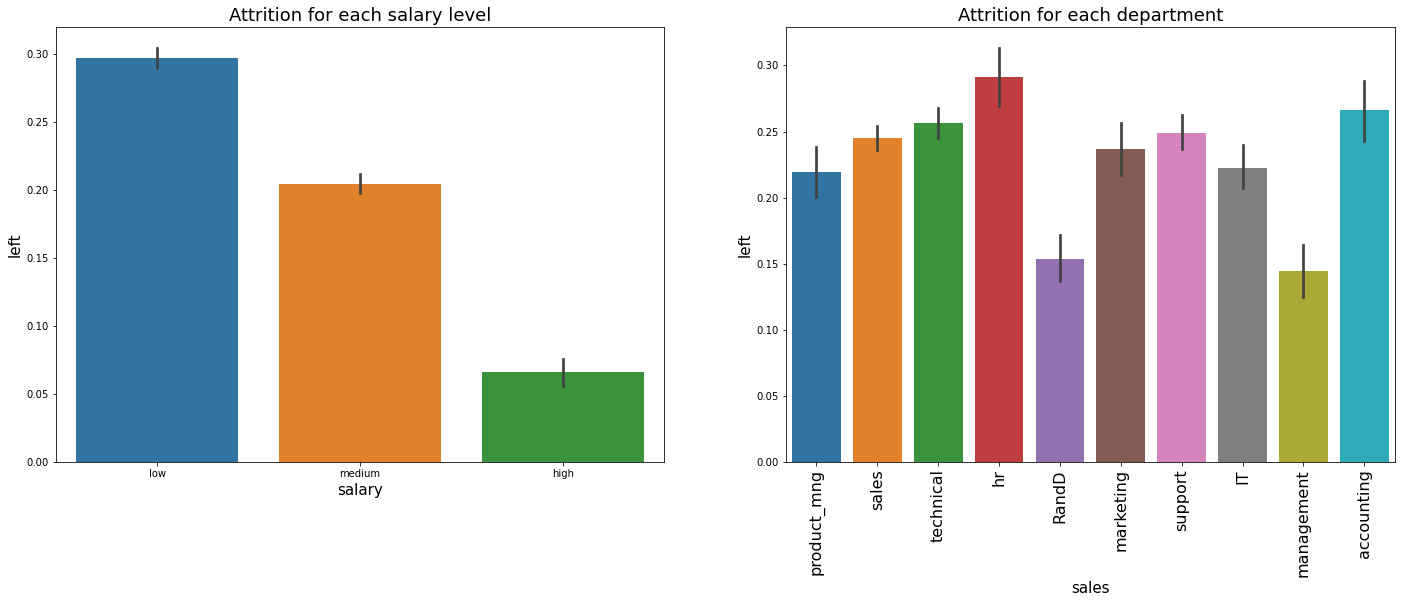

In [8]:
f = plt.figure(figsize = (24,8))
ax0 = f.add_subplot(121)
ax1 = f.add_subplot(122)
plt.xticks(rotation = 90, fontsize=16)
ax0.title.set_text('Attrition for each salary level')
ax0.title.set_fontsize(18)
ax0.set_ylabel('Active Wee1', fontsize = 15.0)
ax0.set_xlabel('Active Wee1', fontsize = 15.0)
ax1.set_ylabel('Active Wee1', fontsize = 15.0)
ax1.set_xlabel('Active Wee1', fontsize = 15.0)
sns.barplot(x = 'salary', y = 'left', data = raw_data, ax= ax0)
ax1.title.set_text('Attrition for each department')
ax1.title.set_fontsize(18)
sns.barplot(x = 'sales', y = 'left', data = raw_data, ax = ax1)
plt.show()

<span style = "color:orange"> <b>Conclusion:</b></span>
1. The max attrition has been in the lowest salary bracket followed by medium and high
2. The R&D and the Management function has shown the minimum attrition

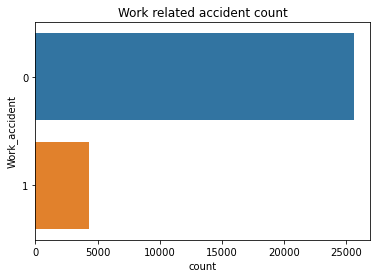

In [9]:
sns.countplot(y = 'Work_accident', data = raw_data)
plt.title("Work related accident count")
plt.show()

<span style = "color:orange"> <b>Conclusion:</b></span>
1. Around 5000 workers have met some kind of accident or the other 

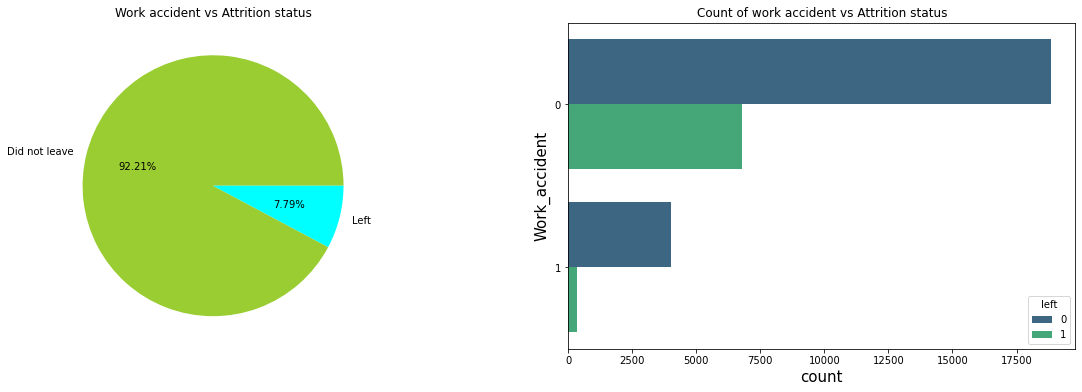

In [10]:
# Some wrangling for pie chart representation
accident = raw_data[raw_data.Work_accident == 1][['Work_accident','left']].reset_index()
wor_acc = accident.groupby('left').sum().drop('index', axis = 1).reset_index().drop('left', axis = 1)
wor_acc.rename(index={0:'Did not leave',1:'Left'}, inplace=True)

f1 = plt.figure(figsize = (20,6))
axs1 = f1.add_subplot(121)
axs2 = f1.add_subplot(122)
axs2.set_ylabel('Active Wee1', fontsize = 15.0)
axs2.set_xlabel('Active Wee1', fontsize = 15.0)
axs1.pie(x = 'Work_accident', data = wor_acc, colors = ['yellowgreen', 'cyan'], labels=wor_acc.index, autopct='%1.2f%%')
axs1.title.set_text('Work accident vs Attrition status')
axs2.title.set_text('Count of work accident vs Attrition status')

sns.countplot(y = 'Work_accident', hue = 'left', data = raw_data, palette = 'viridis', ax = axs2)
plt.show()


In [11]:
print("The percentage of workers who met an accident and left out of the total people who met an accident is:",
      round(100*(len(accident[accident.left == 1])/len(accident)),2),"%")

The percentage of workers who met an accident and left out of the total people who met an accident is: 7.79 %


In [12]:
print("The percentage of workers who didn't meet an accident and left out of the total people who left is:",
      round(100*len(raw_data[raw_data.left==1])/len(raw_data[raw_data.Work_accident == 0].left),2),"%")

The percentage of workers who didn't meet an accident and left out of the total people who left is: 27.83 %


<span style = "color:orange"> <b>Conclusion:</b></span>
1. There seems to be no trend between the number of people who have met an accident and the ones who have left

### <span style = "color:brown">IV. Checking why the best and the most experienced employees are quitting soon</span>

In [13]:
# Let us find the top percentile of employees who have scored well in last evaluation

top_scorers = raw_data[raw_data.last_evaluation.rank(pct = True)>0.80]
print("The employees who have scored above 80 percentile in evaluation have spent {} hours more than the monthly company average".format(round(top_scorers.average_montly_hours.mean()-raw_data.average_montly_hours.mean(),2)))

The employees who have scored above 80 percentile in evaluation have spent 17.84 hours more than the monthly company average


In [16]:
prom_low_scorers = 100*raw_data.loc[set(raw_data.index) - set(top_scorers.index)].promotion_last_5years.value_counts()[1]/raw_data.loc[set(raw_data.index) - set(top_scorers.index)].promotion_last_5years.value_counts()[0]
print("The percentage of promotion given to the top scoring employees in the last 5 years is greater than the below 80 percentile scorers", round(100*top_scorers.promotion_last_5years.value_counts()[1]/top_scorers.promotion_last_5years.value_counts()[0]-prom_low_scorers,2),"%")

The percentage of promotion given to the top scoring employees in the last 5 years is greater than the below 80 percentile scorers -0.24 %


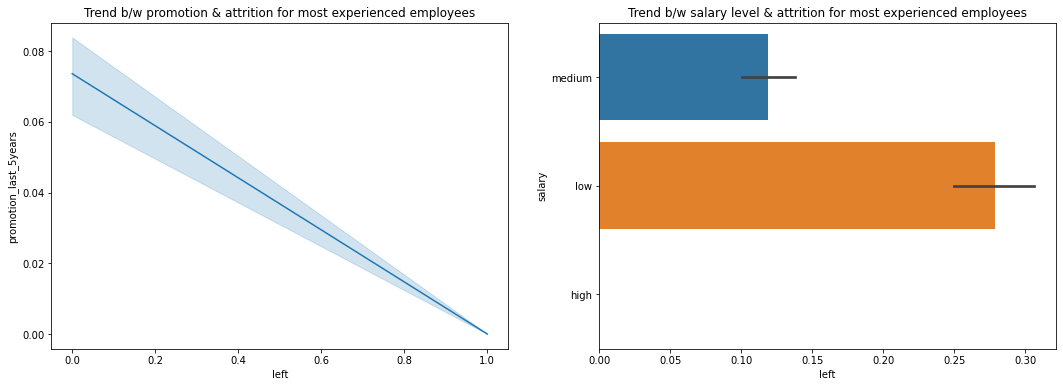

In [17]:
# Let us find the employees who have spent >5 years in the organization and understand their reason for quitting

left_promotion_data = raw_data[raw_data.time_spend_company>5][['left','promotion_last_5years','salary']]
fi = plt.figure(figsize=(18,6))
az1 = fi.add_subplot(121)
az2 = fi.add_subplot(122)
sns.lineplot(x ='left', y = 'promotion_last_5years', data = left_promotion_data , ax = az1)
az1.title.set_text('Trend b/w promotion & attrition for most experienced employees')
az2.title.set_text('Trend b/w salary level & attrition for most experienced employees')
sns.barplot(x = 'left', y = 'salary', data = left_promotion_data, ax = az2)
plt.show()

<span style = "color:orange"> <b>Conclusion:</b></span>
1. The people who have scored above 80 percentile in the evaluation have worked on an average <b>17.84 hours</b> more per month as compared to the organization. However, the promotion of such employees has been <b>0.24% lesser</b> than the low scorers


2. Among the experienced employees, the declining trend of promotion with increasing attrition shows that the employees with >5 years of time in the company who have <b>not been promoted</b> have decided to part with the organization


3. The experienced employees who are <b>paid low salaries</b> have left the most followed by medium salaries. Experienced employees with high salaries have not left at all

## <span style = "color:darkblue"><u>STEP 2</u>: Data preprocessing: wrangling, feature scaling, engineering</span>


### <span style = "color:brown">I. Train test split and feature separation</span>

In order to remove the income bias from coming into our model, we will use a stratified train test split instead of a regular train-test split

In [21]:
def feature_engineering(data, feature_eng = False):
    if feature_eng == True:
        data['5_workex_and_promotion'] = data[data.time_spend_company>=5].promotion_last_5years > 0
        data.replace(np.nan, 'False', inplace=True)
    else:
        pass
    return data

raw_data = feature_engineering(raw_data)

In [22]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,test_size=0.2, random_state=42 )
for train_index, test_index in split.split(raw_data, raw_data['salary']):
    strat_train = raw_data.loc[train_index]
    strat_test = raw_data.loc[test_index]

In [23]:
def feature_seperator(datum):
    feat =  datum.drop(['left'], axis = 1)
    lab = datum['left']
    return feat, lab

X_train, y_train = feature_seperator(strat_train)
X_test, y_test = feature_seperator(strat_test)

In [24]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [25]:
def numcat_seperator(feat, feature_eng = False):
    if feature_eng==True:
        feat_num = feat.drop(['sales', 'salary', 'number_project', 'Work_accident', 'promotion_last_5years','time_spend_company','5_workex_and_promotion'], axis = 1)
        feat_cat = feat[['sales', 'salary','number_project', 'Work_accident', 'promotion_last_5years','time_spend_company','5_workex_and_promotion']]
    else:
        feat_num = feat.drop(['sales', 'salary', 'number_project', 'Work_accident', 'promotion_last_5years','time_spend_company'], axis = 1)
        feat_cat = feat[['sales', 'salary','number_project', 'Work_accident', 'promotion_last_5years','time_spend_company']]
    feat_num.astype('float64')
    feat_cat.astype('str')
    return feat_num, feat_cat

X_train_num, X_train_cat = numcat_seperator(X_train)

### <span style = "color:brown">II. Creating Preprocessing Pipeline for column transformations</span>

In [26]:
from sklearn.preprocessing import Normalizer, OneHotEncoder, FunctionTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

We shall create three pipelines, one for normalizer of average_montly_hours, one for the other two numerical values and one for onehotencoding of categorical values

In [27]:
adder = FunctionTransformer(feature_engineering, validate = False,
                           kw_args = {"feature_eng":False})

In [28]:
X_train_num1 = X_train_num[['average_montly_hours']]
num1_attr = list(X_train_num1)
X_train_num2 = X_train_num.drop('average_montly_hours', axis = 1)
num2_attr = list(X_train_num2)
cat_attr = list(X_train_cat)

num_pipe1 = Pipeline([
    ('normalizer', MinMaxScaler())
])

num_pipe2 = Pipeline([
    ('impute', SimpleImputer(strategy = "median"))
])

cat_pipe = Pipeline([
    ('adder', FunctionTransformer(feature_engineering, validate=False)),
    ('onehotencoder', OneHotEncoder())
])

In [29]:
full_pipeline = ColumnTransformer([
    ('num1', num_pipe1, num1_attr),
    ('num2', num_pipe2, num2_attr),
    ('cat', cat_pipe, cat_attr)
])

In [30]:
X_train_prep = full_pipeline.fit_transform(X_train)

In [31]:
X_train_prep.toarray()[0]

array([0.85514019, 0.09      , 0.8       , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

## <span style = "color:darkblue"><u>STEP 3</u>: Model building and Cross-Validation</span>


We will be doing the following in this section:
1. Create models using a few popular classification algorithms
2. Use cross validation scores on the training set in order to compare the important metrics

In [32]:
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures

In [33]:
# Creating a class to fit all the models we need
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict

class Model_building():
    def __init__(self, model_name = 'lgr'):
        self.model_name = model_name
    def modelling(self, data, label, cv):
        if self.model_name == 'lgr':
            log = LogisticRegressionCV(cv = cv, random_state=42)
            log.fit(data,label)
            pred = cross_val_predict(log, data, label, cv = cv)
            print("Jaccard score:",jaccard_score(label, pred)," F1 score:", f1_score(label, pred), "AUC:", roc_auc_score(label,pred))
            pass
        elif self.model_name == 'knn':
            knn = KNeighborsClassifier(n_neighbors=3)
            knn.fit(data, label)
            pred = cross_val_predict(knn, data, label, cv = cv)
            print("Jaccard score:",jaccard_score(label, pred)," F1 score:", f1_score(label, pred), "AUC:", roc_auc_score(label,pred))
            return knn
        elif self.model_name == 'decision':
            tree = DecisionTreeClassifier(random_state=42)
            tree.fit(data,label)
            pred = cross_val_predict(tree, data, label, cv = cv)
            print("Jaccard score:",jaccard_score(label, pred)," F1 score:", f1_score(label, pred), "AUC:", roc_auc_score(label,pred))
            return tree
        elif self.model_name == 'rf':
            rf = RandomForestClassifier(random_state=42)
            rf.fit(data,label)
            pred = cross_val_predict(rf, data, label, cv = cv)
            print("Jaccard score:",jaccard_score(label, pred)," F1 score:", f1_score(label, pred), "AUC:", roc_auc_score(label,pred))
            return rf
        elif self.model_name == 'svm':
            svc = SVC(random_state=42)
            svc.fit(data,label)
            pred = cross_val_predict(svc, data, label, cv = cv)
            print("Jaccard score:",jaccard_score(label, pred)," F1 score:", f1_score(label, pred), "AUC:", roc_auc_score(label,pred))
            return svc
        elif self.model_name == 'extra':
            extra = ExtraTreeClassifier()
            extra.fit(data,label)
            pred = cross_val_predict(extra, data, label, cv = cv)
            print("Jaccard score:",jaccard_score(label, pred)," F1 score:", f1_score(label, pred), "AUC:", roc_auc_score(label,pred))
            return extra
        elif self.model_name == 'sgd':
            sgd = SGDClassifier(tol = 0.0001, early_stopping=True, random_state=42 )
            sgd.fit(data,label)
            pred = cross_val_predict(sgd, data, label, cv = cv)
            print("Jaccard score:",jaccard_score(label, pred)," F1 score:", f1_score(label, pred), "AUC:", roc_auc_score(label,pred))
            pass
        elif self.model_name == 'ada':
            ada = AdaBoostClassifier(random_state=42)
            ada.fit(data,label)
            pred = cross_val_predict(ada, data, label, cv = cv)
            print("Jaccard score:",jaccard_score(label, pred)," F1 score:", f1_score(label, pred), "AUC:", roc_auc_score(label,pred))
            return ada
        elif self.model_name == 'mlp':
            mlp = MLPClassifier(random_state=42,early_stopping=True)
            mlp.fit(data,label)
            pred = cross_val_predict(mlp, data, label, cv = cv)
            print("Jaccard score:",jaccard_score(label, pred)," F1 score:", f1_score(label, pred), "AUC:", roc_auc_score(label,pred))
            return mlp
        pass
    pass


#### <span style = "color:green">We will create an object and call the function to check the metrics with cross validated predictions using the below models

In [37]:
# Logistic regression
from warnings import filterwarnings
filterwarnings('ignore')

model = Model_building(model_name='lgr')
model.modelling(data = X_train_prep, label = y_train, cv = 5)

Jaccard score: 0.6463846044997877  F1 score: 0.7852170176192521 AUC: 0.861218615647134


In [38]:
# K Nearest neighbours
model = Model_building(model_name='knn')
knn = model.modelling(data = X_train_prep, label = y_train, cv = 5)

Jaccard score: 0.8661193558572782  F1 score: 0.9282571912013536 AUC: 0.9611546696408997


In [39]:
# Decision tree classifier
model = Model_building(model_name='decision')
tree = model.modelling(data = X_train_prep, label = y_train, cv = 5)

Jaccard score: 0.9726542471372415  F1 score: 0.9861375844740947 AUC: 0.9922198358452254


In [40]:
# Support vector classifier
model = Model_building(model_name='svm')
svc = model.modelling(data = X_train_prep, label = y_train, cv = 5)

Jaccard score: 0.8399547803617571  F1 score: 0.9130167646800668 AUC: 0.940253848867027


In [51]:
# Random forest classifier
model = Model_building(model_name='rf')
rf = model.modelling(data = X_train_prep, label = y_train, cv = 5)

Jaccard score: 0.9842150910667823  F1 score: 0.992044759157269 AUC: 0.9930972250026215


In [43]:
# Extra trees classifier
model = Model_building(model_name='extra')
extra = model.modelling(data = X_train_prep, label = y_train, cv = 5)

Jaccard score: 0.9523487664751605  F1 score: 0.9755928682707288 AUC: 0.9855999466163334


In [44]:
# Stochastic gradient descent classifier
model = Model_building(model_name='sgd')
model.modelling(data = X_train_prep, label = y_train, cv = 5)

Jaccard score: 0.6626811084540724  F1 score: 0.7971235194585449 AUC: 0.8725070399710204


In [46]:
# Adaptive bootstrapping classifier
model = Model_building(model_name='ada')
ada = model.modelling(data = X_train_prep, label = y_train, cv = 5)

Jaccard score: 0.8370813784177318  F1 score: 0.9113166006164685 AUC: 0.9382065757237776


In [48]:
# Multi-layered perceptron
model = Model_building(model_name='mlp')
mlp = model.modelling(data = X_train_prep, label = y_train, cv = 5)

Jaccard score: 0.8499101747509391  F1 score: 0.9188664253553457 AUC: 0.9424052201599604


## <span style = "color:darkblue"><u>STEP 4</u>: Model selection using Grid Search with cross validation</span>


<span style = "color:orange"><b>Based on the previous step's results and the order of metrics, let us run the grid search for the following models:</b></span>
1. KNN
2. Tree based models
3. Ensemble models
4. SVC

<u>NOTE</u>: I could not use grid search on all the models because of limited computational power, hence I have chosen the best 4 models basis the cross-validation results

In [49]:
from sklearn.model_selection import GridSearchCV

### <span style = "color:brown">I. Grid search for Random Forest</span>

In [52]:
param_grid = [
    {'n_estimators':[3,10,30,80], 'max_features':[2,4,6,8,10]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]

grid_search = GridSearchCV(rf, param_grid, cv=5,
                           scoring = "neg_mean_squared_error", return_train_score=True )
grid_search.fit(X_train_prep,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 80]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 80}

In [54]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train_prep, y_train)
pred_train = rf_best.predict(X_train_prep)
print("Jaccard score:",jaccard_score(y_train, pred_train)," F1 score:", f1_score(y_train, pred_train), "AUC:", 
      roc_auc_score(y_train,pred_train))

Jaccard score: 0.999652113411028  F1 score: 0.9998260264439806 AUC: 0.9998856159617163


### <span style = "color:brown">II. Grid search for KNN</span>

In [55]:
params = {'n_neighbors' : [2, 3, 4 ,6, 7]}
grid_knn = GridSearchCV(knn, params, cv = 10)
grid_knn.fit(X_train_prep, y_train)
grid_knn.best_params_

{'n_neighbors': 2}

In [56]:
knn_best = grid_knn.best_estimator_
knn_best.fit(X_train_prep, y_train)
pred_train = knn_best.predict(X_train_prep)
print("Jaccard score:",jaccard_score(y_train, pred_train)," F1 score:", f1_score(y_train, pred_train), "AUC:", 
      roc_auc_score(y_train,pred_train))

Jaccard score: 0.9930410577592206  F1 score: 0.9965083798882681 AUC: 0.9965205288796103


### <span style = "color:brown">III. Grid search for SVC</span>   - Warning - Takes >1 hour

In [57]:
params = {'C' : [1,10], 'kernel':('linear', 'poly', 'rbf'), 'degree': [1,3,5]}
grid_svm = GridSearchCV(svc, params, cv = 10)
grid_svm.fit(X_train_prep, y_train)
grid_svm.best_estimator_

SVC(C=10, degree=5, kernel='poly', random_state=42)

In [58]:
svc_best = grid_svm.best_estimator_
svc_best.fit(X_train_prep, y_train)
pred_train = svc_best.predict(X_train_prep)
print("Jaccard score:",jaccard_score(y_train, pred_train)," F1 score:", f1_score(y_train, pred_train), "AUC:", 
      roc_auc_score(y_train,pred_train))

Jaccard score: 0.9253530598520511  F1 score: 0.961229479566888 AUC: 0.9732957741108283


### <span style = "color:brown">IV. Grid search for Decision tree</span>

In [59]:
params = {'max_depth' : [2, 4, 6, 10, 20, 30], 'max_features':[2,4,6,8], 'min_samples_split': [2,4,6,8]}
grid_tree = GridSearchCV(tree, params, cv = 10)
grid_tree.fit(X_train_prep, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 20, 30],
                         'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]})

In [60]:
best_tree = grid_tree.best_estimator_
best_tree.fit(X_train_prep, y_train)
pred_train = best_tree.predict(X_train_prep)
print("Jaccard score:",jaccard_score(y_train, pred_train)," F1 score:", f1_score(y_train, pred_train), "AUC:", 
      roc_auc_score(y_train,pred_train))

Jaccard score: 1.0  F1 score: 1.0 AUC: 1.0


## <span style = "color:darkblue"><u>STEP 5</u>: Model evaluation</span>

In [61]:
# Pre=processing on the holdout dataset
X_test_prep = full_pipeline.fit_transform(X_test)

### <span style = "color:brown">I. Model evaluation on KNN</span>  

In [62]:
knn_pred = knn_best.predict(X_test_prep)
print("Jaccard score:",jaccard_score(y_test, knn_pred)," F1 score:", f1_score(y_test, knn_pred), "AUC:", 
      roc_auc_score(y_test, knn_pred))

Jaccard score: 0.9505649717514124  F1 score: 0.9746560463432296 AUC: 0.9803951679270566


### <span style = "color:brown">II. Model evaluation on SVC</span>  

In [63]:
svc_pred = svc_best.predict(X_test_prep)
print("Jaccard score:",jaccard_score(y_test, svc_pred)," F1 score:", f1_score(y_test, svc_pred), "AUC:", 
      roc_auc_score(y_test, svc_pred))

Jaccard score: 0.9110807113543091  F1 score: 0.9534717251252685 AUC: 0.9703801603672086


### <span style = "color:brown">III. Model evaluation on Decision tree</span>  

In [64]:
tree_pred = best_tree.predict(X_test_prep)
print("Jaccard score:",jaccard_score(y_test, tree_pred)," F1 score:", f1_score(y_test, tree_pred), "AUC:", 
      roc_auc_score(y_test, tree_pred))

Jaccard score: 0.9871794871794872  F1 score: 0.9935483870967743 AUC: 0.9960450189416711


### <span style = "color:brown">IV. Model evaluation on Random Forest</span>  

In [65]:
rf_pred = rf_best.predict(X_test_prep)
print("Jaccard score:",jaccard_score(y_test, rf_pred)," F1 score:", f1_score(y_test, rf_pred), "AUC:", 
      roc_auc_score(y_test, rf_pred))

Jaccard score: 0.992831541218638  F1 score: 0.9964028776978416 AUC: 0.9966633254235789


### <span style = "color:brown">V. Comparison of various Evaluation metrics for the models</span> 

In [66]:
from sklearn.metrics import precision_score, recall_score

In [67]:
print("Random forest Precision:",precision_score(y_test, rf_pred), "Random forest Recall:", recall_score(y_test, rf_pred))

Random forest Precision: 0.9992784992784993 Random forest Recall: 0.9935437589670014


In [68]:
print("SVM Precision:",precision_score(y_test, svc_pred), "SVM Recall:", recall_score(y_test, svc_pred))

SVM Precision: 0.9514285714285714 SVM Recall: 0.9555236728837877


In [69]:
print("Decision tree Precision:",precision_score(y_test, tree_pred), "Decision tree Recall:", recall_score(y_test, tree_pred))

Decision tree Precision: 0.9928366762177651 Decision tree Recall: 0.994261119081779


In [70]:
print("Decision tree Precision:",precision_score(y_test, knn_pred), "Decision tree Recall:", recall_score(y_test, knn_pred))

Decision tree Precision: 0.9839181286549707 Decision tree Recall: 0.9655667144906743


In [71]:
data = {'Algorithm':[],'Jaccard':[], 'Precision':[], 'Recall':[], 'AUC':[]}
rep = pd.DataFrame(data, columns = list(data.keys()))
rep['Algorithm'] = ['KNN','Decision Tree', 'SVM', 'RandomForest']

Creating a data-frame containing the various metrics

In [80]:
jacc = [jaccard_score(y_test, knn_pred), jaccard_score(y_test, tree_pred),jaccard_score(y_test, svc_pred),jaccard_score(y_test, rf_pred)]
pre = [precision_score(y_test, knn_pred),precision_score(y_test, tree_pred),precision_score(y_test, svc_pred),precision_score(y_test, rf_pred)]
rec = [recall_score(y_test, knn_pred), recall_score(y_test, tree_pred),recall_score(y_test, svc_pred),recall_score(y_test, rf_pred)]
auc = [roc_auc_score(y_test, knn_pred), roc_auc_score(y_test, tree_pred),roc_auc_score(y_test, svc_pred),roc_auc_score(y_test, rf_pred)]
rep['Jaccard'] = jacc
rep['Precision'] = pre
rep['Recall'] = rec
rep['AUC'] = auc
print("The model evaluation table on the holdout set is:")
rep

The model evaluation table on the holdout set is:


,Algorithm,Jaccard,Precision,Recall,AUC
0,KNN,0.950565,0.983918,0.965567,0.980395
1,Decision Tree,0.987179,0.992837,0.994261,0.996045
2,SVM,0.911081,0.951429,0.955524,0.970380
3,RandomForest,0.992832,0.999278,0.993544,0.996663


#### <span style = "color:darkblue"> <b><u>Conclusion</u>:</b></span> <span style = "color:brown">Based on the above table, we can say that <i>Random Forest</i> is indeed the best model which has the highest score for precision, recall as well as AUC</span>

## <span style = "color:darkblue"><u>STEP 6</u>: Model forecast and prediction results</span>

### <span style = "color:brown">I. Forecasting values on train set from the best model turning feature engineering on</span>  

In [93]:
print("The predictions using the best random forest model are: ",rf_pred)

The predictions using the best random forest model are:  [1 0 1 ... 1 1 0]


Turning the feature engineering on and making the forecast using the best model

In [128]:
adder = FunctionTransformer(feature_engineering, validate = False,
                           kw_args = {"feature_eng":True})

X_train_prep = full_pipeline.fit_transform(X_train)
X_test_prep = full_pipeline.fit_transform(X_test)

rf_best.fit(X_train_prep, y_train)
final_pred = rf_best.predict(X_test_prep)
print("The best model is",rf_best,"\n\nAccuracy metrics:")
print("\nJaccard score:",jaccard_score(y_test, final_pred),"\nPrecision:", precision_score(y_test, final_pred), "\nRecall:", recall_score(y_test, final_pred), "\n\nGoodness of a fit metrics:\n\nAUC:", 
      roc_auc_score(y_test, final_pred))

The best model is RandomForestClassifier(max_features=10, n_estimators=80, random_state=42) 

Accuracy metrics:

Jaccard score: 0.992831541218638 
Precision: 0.9992784992784993 
Recall: 0.9935437589670014 

Goodness of a fit metrics:

AUC: 0.9966633254235789


### <span style = "color:brown">II. Plotting the precision-recall curve</span>  

In [121]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, final_pred)

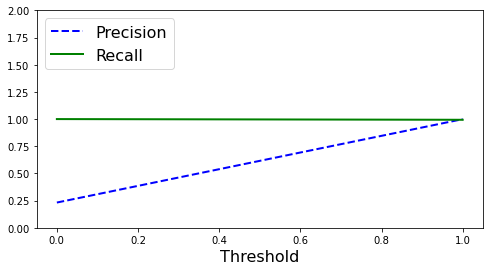

In [122]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 2])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

As expected, recall decreases as precision increases with an intersection at 0.95 value of Threshold